In [1]:
#LABORATORIO 1

# 1. Importación de Librerías para Análisis y Visualización

In [1]:
# Utilizado para manejos de directorios y rutas
import os

# Computación vectorial y científica para Python
import numpy as np #sirve para manipular multiplicar arreglos y vectores
import pandas as pd #sirve para leer los archivos csv

# Librerías para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# Permite que las gráficas de Matplotlib se muestren dentro del cuaderno de Jupyter
%matplotlib inline
#regresion es un problema de prediccion que busca predecir una variable continua(numerica)

# 2. Carga de Datos desde un Archivo CSV

In [2]:
# Ruta del archivo CSV que contiene el conjunto de datos
dataset_path = "nba.csv"

# Carga los datos del archivo CSV en un DataFrame de pandas
data = pd.read_csv(dataset_path)#organizamos los datos en filas y columnas 

# 3. Selección y Visualización de Características del Conjunto de Datos

In [3]:
# Selección de características del conjunto de datos y conversión a un array de numpy
X = data[["age", "player_height", "player_weight", "gp", "net_rating",
          "oreb_pct", "usg_pct", "ts_pct", "ast_pct"]].values  # Convertir a numpy
y = data["pts"].values  # Variable objetivo (puntos anotados)

# Número de ejemplos en el conjunto de datos
m = y.size #para calcular el numero de ejemplos  

# Imprimir algunos puntos de datos para inspección, para hacer un control
print(f"Número de ejemplos de entrenamiento: {m}")
print('{:>8s}{:>8s}{:>8s}{:>8s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'age', 'height', 'weight', 'gp', 'net_rating', 'oreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'pts'))
print('-' * 90)

# Mostrar hasta 10 ejemplos del conjunto de datos
for i in range(min(10, m)):  
    print('{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}'.format(
        X[i, 0], X[i, 1], X[i, 2], X[i, 3], X[i, 4], X[i, 5], X[i, 6], X[i, 7], X[i, 8], y[i]
    ))

Número de ejemplos de entrenamiento: 12844
     age  height  weight      gpnet_rating  oreb_pct   usg_pct    ts_pct   ast_pct       pts
------------------------------------------------------------------------------------------
      22     193      95      64      0.30      0.04      0.17      0.49      0.25      3.90
      28     190      86       4      8.90      0.03      0.17      0.50      0.04      3.80
      26     203     103      41     -8.20      0.11      0.17      0.51      0.12      8.30
      30     203     102      64     -2.70      0.03      0.21      0.53      0.12     10.20
      23     213     120      52    -14.10      0.10      0.20      0.50      0.06      2.80
      33     198     102      80     -5.80      0.03      0.20      0.50      0.14     10.60
      26     231     137      73      6.90      0.10      0.18      0.62      0.02     10.60
      30     203     100      79      3.20      0.03      0.27      0.60      0.09     26.80
      24     201     107     

# 4. Normalización de Características

In [4]:
def featureNormalize(X):
    
    # Normaliza las características restando la media y dividiendo por la desviación estándar
    
    X_norm = X.copy()#se hace una copia de x, evita modificar x original
    
    mu = np.mean(X, axis=0)  # Calcula la media (promedio) de cada columna (característica) de X
    
    sigma = np.std(X, axis=0) # saca la desviacion estandar(varianza) de cada columna en base a la media
    
    X_norm = (X - mu) / sigma  # Aplicar normalización(formula)

    return X_norm, mu, sigma  # Retorna datos normalizados, media y desviación estándar
    #Evita que características con valores grandes dominen a otras más pequeñas


# 5. Aplicación de la Normalización de Características

In [5]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.20000000e+01 1.93040000e+02 9.48007280e+01 ... 1.69000000e-01
  4.87000000e-01 2.48000000e-01]
 [2.80000000e+01 1.90500000e+02 8.61824800e+01 ... 1.74000000e-01
  4.97000000e-01 4.30000000e-02]
 [2.60000000e+01 2.03200000e+02 1.03418976e+02 ... 1.75000000e-01
  5.12000000e-01 1.25000000e-01]
 ...
 [2.50000000e+01 2.05740000e+02 1.02511792e+02 ... 1.68000000e-01
  5.93000000e-01 5.20000000e-02]
 [2.40000000e+01 2.08280000e+02 1.13398000e+02 ... 7.40000000e-02
  7.80000000e-01 4.40000000e-02]
 [3.30000000e+01 2.05740000e+02 1.02965384e+02 ... 1.69000000e-01
  6.50000000e-01 9.40000000e-02]]
Media calculada: [ 2.70453130e+01  2.00555097e+02  1.00263279e+02  5.11541576e+01
 -2.22633915e+00  5.40731081e-02  1.84640766e-01  5.13138353e-01
  1.31595142e-01]
Desviación estandar calculada: [ 4.33904176  9.11073552 12.42614432 25.08392759 12.66463109  0.04333306
  0.0535428   0.10172031  0.09416814]
[[-1.16277124 -0.82486167 -0.43960146 ... -0.29211708 -0.25696296
   1.23613849]
 [ 0.2200225

# 6. Adición del Término de Intersección

In [6]:
# Añade el termino de interseccion(sesgo) a X
# (Columna de unos para X0), m representa el numero de ejemplos, se concatena a las x_norm
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [7]:
print(X)

[[ 1.         -1.16277124 -0.82486167 ... -0.29211708 -0.25696296
   1.23613849]
 [ 1.          0.22002255 -1.10365365 ... -0.19873384 -0.15865418
  -0.94081867]
 [ 1.         -0.24090872  0.29030625 ... -0.1800572  -0.01119101
  -0.07003581]
 ...
 [ 1.         -0.47137435  0.56909823 ... -0.31079373  0.78511014
  -0.84524494]
 [ 1.         -0.70183998  0.84789021 ... -2.06639865  2.6234844
  -0.93019937]
 [ 1.          1.3723507   0.56909823 ... -0.29211708  1.34547021
  -0.39923421]]


# 7. Cálculo de la Función de Costo para Múltiples Variables

In [8]:
def computeCostMulti(X, y, theta):#definimos la funcion para calcular el costo
    # Inicializa algunos valores utiles
    m = y.shape[0] # creamos una variable local que almacena el num de ejem de entrenamiento

    J = 0 #inicializamos la fun de costo en cero 

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot (X,theta) - y))#aqui aplicamos la hipotesis

    return J


# 8. Implementación del Descenso por el Gradiente para Múltiples Variables

In [9]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):#funcion del descenso

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = [] #inicializamos un arreglo vacio para almacenar el historial de la funcion de costo

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)#calculamos tetha con form descenso por el gradiente 
        J_history.append(computeCostMulti(X, y, theta))#CALCULAMOS LA FUN DE COSTO con la nueva tetha y almacenamos en j_h

    return theta, J_history

# 9. Ejecución del entrenamiento con Descenso por Gradiente y Predicción

Theta calculado por el descenso por gradiente: [ 8.06246381  0.11461654  0.42606944  0.36594549  2.16135324  0.34950242
 -0.53339592  3.08870355  0.95352352  0.89304697]
Puntos esperados para el jugador ingresado: 16.59


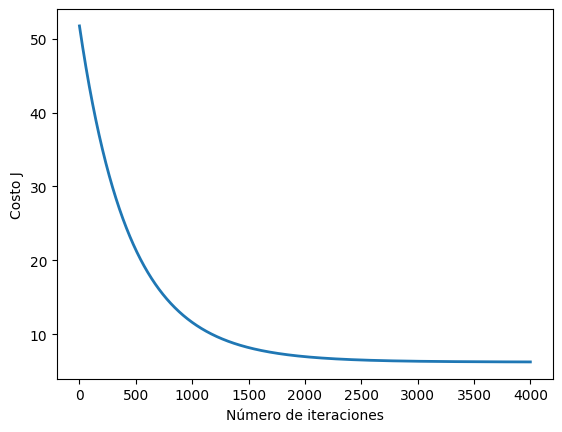

In [10]:
# Definir la tasa de aprendizaje y el número de iteraciones para el descenso por gradiente
#si es muy grande toma muy en cuenta cualquier error de las iteraciones y modifica mucho el resultado
#si es muy pequenio tarda mucho en aprender hay que equilibrar 
alpha = 0.001  # Se pueden probar diferentes valores, por ejemplo, alpha = 0.003
num_iters = 4000  

# Inicializar theta con ceros (9 variables predictoras + 1 término de sesgo)
theta = np.zeros(10)

# Ejecutar el descenso por gradiente para minimizar la función de costo
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)#pasamos a las variables los valores para que nos devuelva theta y j history

# Graficar la convergencia del costo durante las iteraciones
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')

# Imprimir los valores óptimos de theta encontrados
print('Theta calculado por el descenso por gradiente:', theta)

# Ejemplo de predicción: estimar puntos anotados por un jugador con características dadas
#le mandamos unos valores para realizar una prediccion incluyendo el termino de sesgo(1)
X_array = np.array([1, 34.0, 190.5, 82.0, 70, 5.1, 0.030, 0.250, 0.590, 0.420])  # Incluye el sesgo

# Normalizar características (excepto el término de sesgo)
X_array[1:] = (X_array[1:] - mu) / sigma  

# Calcular la predicción usando el modelo entrenado
prediccion_pts = np.dot(X_array, theta)#con dot multiplicamos matrices  

# Mostrar la predicción de puntos para el jugador ingresado
print('Puntos esperados para el jugador ingresado: {:.2f}'.format(prediccion_pts))

#en esta grafica podemos ver como se entrena el modelo, disminuyendo el error de la fun de costo

# 10. Predicción de Puntos para un Jugador Específico

In [11]:
# Estimar los puntos esperados para un jugador de 25 años, 198 cm de altura, 95 kg de peso,
# 65 partidos jugados, net rating de 5.4, 9.3% de rebotes ofensivos, 23.5% de uso,
# 58.1% de true shooting y 18.2% de asistencias.
X_array = np.array([1,25, 198, 95, 65, 5.4, 0.093, 0.235, 0.581, 0.182])  
X_array[1:] = (X_array[1:] - mu) / sigma   
prediccion_pts = np.dot(X_array, theta)  
print('Puntos esperados para el jugador ingresado: {:.2f}'.format(prediccion_pts))

Puntos esperados para el jugador ingresado: 12.68


In [12]:
# Estimar los puntos esperados para un jugador de 24 años, 192 cm de altura, 88 kg de peso,
# 60 partidos jugados, net rating de 2.9, 8.1% de rebotes ofensivos, 20.5% de uso,
# 54.3% de true shooting y 14.8% de asistencias.
X_array = np.array([1,24, 192, 88, 60, 2.9, 0.081, 0.205, 0.543, 0.148])  
X_array[1:] = (X_array[1:] - mu) / sigma   
prediccion_pts = np.dot(X_array, theta)   
print('Puntos esperados para el jugador ingresado: {:.2f}'.format(prediccion_pts))

Puntos esperados para el jugador ingresado: 9.40


In [13]:
# Estimar los puntos esperados para un jugador de 32 años, 206 cm de altura, 102 kg de peso,
# 80 partidos jugados, net rating de 4.8, 10.2% de rebotes ofensivos, 21.7% de uso,
# 57.8% de true shooting y 17.9% de asistencias.
X_array = np.array([1,32, 206, 102, 80, 4.8, 0.102, 0.217, 0.578, 0.179])  
X_array[1:] = (X_array[1:] - mu) / sigma   
prediccion_pts = np.dot(X_array, theta)  
print('Puntos esperados para el jugador ingresado: {:.2f}'.format(prediccion_pts))

Puntos esperados para el jugador ingresado: 13.51


# 11. Evaluación del Modelo de Regresión: Análisis de Errores

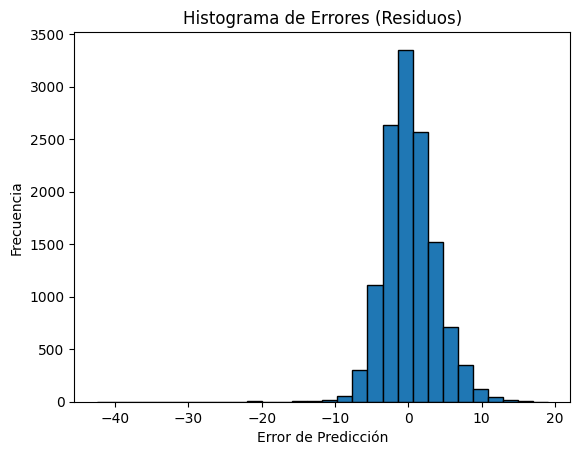

In [14]:
import matplotlib.pyplot as plt

y_pred = np.dot(X, theta)
# Graficar el histograma de los errores de predicción para analizar la distribución de los residuos
errores = y - y_pred  
plt.hist(errores, bins=30, edgecolor='black') 
plt.xlabel('Error de Predicción')  
plt.ylabel('Frecuencia')  
plt.title('Histograma de Errores (Residuos)')  
plt.show()


In [15]:
max_puntos = data["pts"].max()#calculamos el maximo de calculos anotados
print("Máximo de puntos anotados por un jugador:", max_puntos)

Máximo de puntos anotados por un jugador: 36.1


In [16]:
import sys
print(sys.executable)

C:\Users\Bruno\AppData\Local\Programs\Python\Python310\python.exe


In [17]:
from sklearn.metrics import mean_absolute_error

# Calcula el Error Absoluto Medio (MAE), que mide la magnitud promedio de los errores entre los valores reales (y) y los predichos (y_pred),
# sin tener en cuenta la dirección del error (es decir, sin importar si la predicción fue mayor o menor que el valor real).
mae = mean_absolute_error(y, y_pred)
print("Error Absoluto Medio (MAE):", mae)

Error Absoluto Medio (MAE): 2.674276522346509


In [18]:
# Extra [(2.67*100)/36.1] = 7.4
# 100 - 7.4 = 92.6% de precisión

# 12. Ecuación de la Normal

In [19]:
# Leer el archivo CSV
dataset_path = "nba.csv"
data = pd.read_csv(dataset_path)

# Seleccionar características y convertir a numpy
X = data[["age", "player_height", "player_weight", "gp", "net_rating",
          "oreb_pct", "usg_pct", "ts_pct", "ast_pct"]].values  # Convertir a numpy
y = data["pts"].values  # Variable objetivo (puntos anotados)
m = y.size  
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# 13. Función para Calcular los Parámetros de Regresión Lineal Usando la Ecuación Normal

In [20]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])#inicializamos tetha con zeros, shape cantidad de variables predictoras 

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)#utilizamos la formula dada en las diapositivas

    return theta

# 14.  Predicción de Puntos para un Jugador Específico

In [21]:
# Calcular los parámetros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));#convierte el vector tetha a una cadena de texto

# Datos de ejemplo: Estimar los puntos de un jugador con características específicas
X_array = [1,34.0, 190.5, 82.0, 70, 5.1, 0.030, 0.250, 0.590, 0.420]

puntos = np.dot(X_array, theta)#multiplica la nueva x con tetha

print('Puntos esperados para el jugador ingresado (usando la ecuación de la normal): {:.2f}'.format(puntos))


Theta calculado a partir de la ecuación de la normal: [-2.76604239e+01  3.27839682e-02  6.22414094e-02  2.19282457e-02
  8.78476362e-02  2.75448800e-02 -1.40890397e+01  5.90991114e+01
  8.85808608e+00  8.94246536e+00]
Puntos esperados para el jugador ingresado (usando la ecuación de la normal): 16.73


In [22]:
# Estimar los puntos esperados para un jugador de 25 años, 198 cm de altura, 95 kg de peso,
# 65 partidos jugados, net rating de 5.4, 9.3% de rebotes ofensivos, 23.5% de uso,
# 58.1% de true shooting y 18.2% de asistencias.
X_array = [1,25, 198, 95, 65, 5.4, 0.093, 0.235, 0.581, 0.182]
price = np.dot(X_array, theta)
print('Puntos esperados para el jugador ingresado (usando la ecuación de la normal): {:.2f}'.format(price))

Puntos esperados para el jugador ingresado (usando la ecuación de la normal): 12.78


In [23]:
# Estimar los puntos esperados para un jugador de 24 años, 192 cm de altura, 88 kg de peso,
# 60 partidos jugados, net rating de 2.9, 8.1% de rebotes ofensivos, 20.5% de uso,
# 54.3% de true shooting y 14.8% de asistencias.
X_array = [1,24, 192, 88, 60, 2.9, 0.081, 0.205, 0.543, 0.148]
price = np.dot(X_array, theta)
print('Puntos esperados para el jugador ingresado (usando la ecuación de la normal): {:.2f}'.format(price))

Puntos esperados para el jugador ingresado (usando la ecuación de la normal): 9.46


In [24]:
# Estimar los puntos esperados para un jugador de 32 años, 206 cm de altura, 102 kg de peso,
# 80 partidos jugados, net rating de 4.8, 10.2% de rebotes ofensivos, 21.7% de uso,
# 57.8% de true shooting y 17.9% de asistencias.
X_array = [1,32, 206, 102, 80, 4.8, 0.102, 0.217, 0.578, 0.179]
price = np.dot(X_array, theta)
print('Puntos esperados para el jugador ingresado (usando la ecuación de la normal): {:.2f}'.format(price))

Puntos esperados para el jugador ingresado (usando la ecuación de la normal): 13.72
